In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


<Axes: xlabel='Age', ylabel='Experience'>

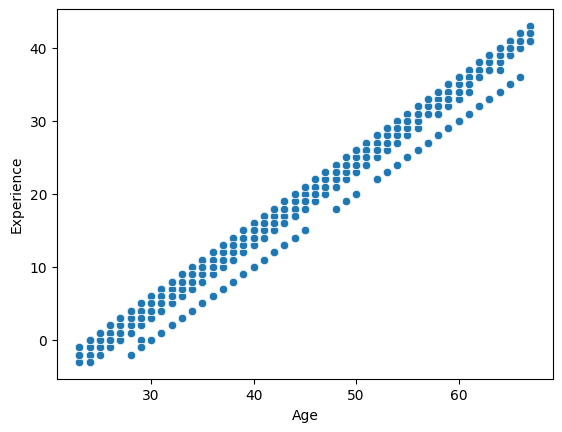

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Age',y='Experience',data=df)

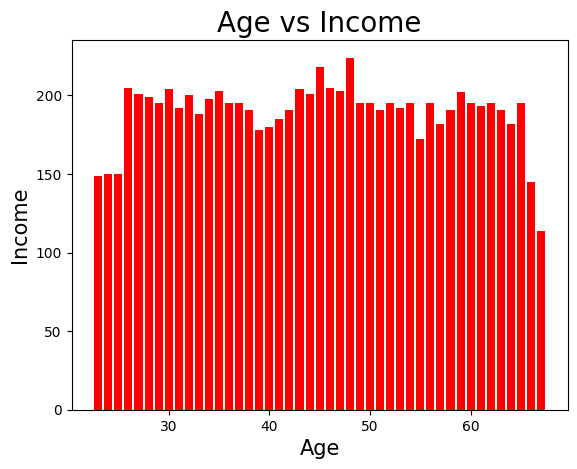

In [9]:
x=df['Age']
y=df['Income']
plt.xlabel('Age',size=15)
plt.ylabel('Income',size=15)
plt.title('Age vs Income',size=20)
plt.bar(x,y,color='red')
plt.show()

In [15]:
X = df.drop(columns=['ZIP Code','Securities Account','Online','Personal Loan','Family'], axis=1)

In [14]:
X

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,CreditCard
0,1,25,1,49,4,1.6,0,0,0,0
1,2,45,19,34,3,1.5,0,0,0,0
2,3,39,15,11,1,1.0,0,0,0,0
3,4,35,9,100,1,2.7,1,0,0,0
4,5,35,8,45,4,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,2,0,0,0
4996,4997,30,4,15,4,0.4,0,85,0,0
4997,4998,63,39,24,2,0.3,2,0,0,0
4998,4999,65,40,49,3,0.5,1,0,0,0


In [16]:
Y=df['Personal Loan']
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=200)

<Axes: ylabel='Age'>

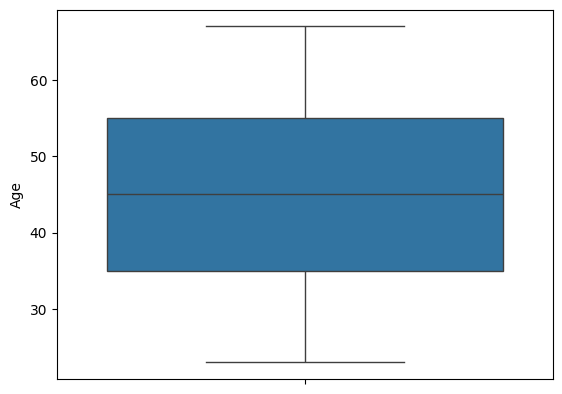

In [45]:
sns.boxplot(df['Age'])

In [35]:
features=['ID','Age','Experience','Income','Family','CCAvg','Education','Mortgage','CD Account','CreditCard']
X=df[features]
X=X.fillna(X.median())

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_scaled_df=pd.DataFrame(X_scaled,columns=features)
print(X_scaled_df.head())

         ID       Age  Experience    Income    Family     CCAvg  Education  \
0 -1.731704 -1.774417   -1.666078 -0.538229  1.397414 -0.193385  -1.049078   
1 -1.731012 -0.029524   -0.096330 -0.864109  0.525991 -0.250611  -1.049078   
2 -1.730319 -0.552992   -0.445163 -1.363793 -1.216855 -0.536736  -1.049078   
3 -1.729626 -0.901970   -0.968413  0.569765 -1.216855  0.436091   0.141703   
4 -1.728933 -0.901970   -1.055621 -0.625130  1.397414 -0.536736   0.141703   

   Mortgage  CD Account  CreditCard  
0 -0.555524    -0.25354   -0.645314  
1 -0.555524    -0.25354   -0.645314  
2 -0.555524    -0.25354   -0.645314  
3 -0.555524    -0.25354   -0.645314  
4 -0.555524    -0.25354    1.549632  


In [36]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
input_data = pd.DataFrame([[10,34,9,180,1,8.9,3,0,0,0]], columns=['ID','Age','Experience','Income','Family','CCAvg','Education','Mortgage','CD Account','CreditCard'])
prediction =model.predict(input_data)
print("The result according to the given data is",prediction)

The result according to the given data is [1]


In [30]:
accuracy=model.score(X_test,Y_test)
print(accuracy)

0.945


In [38]:

prediction = model.predict(X_test)
matrix = confusion_matrix(Y_test, prediction)
print(matrix)

[[890  20]
 [ 40  50]]


In [47]:
prediction = model.predict(X_test)
print("Classification Report:\n",classification_report(Y_test, prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       910
           1       0.71      0.56      0.62        90

    accuracy                           0.94      1000
   macro avg       0.84      0.77      0.80      1000
weighted avg       0.94      0.94      0.94      1000



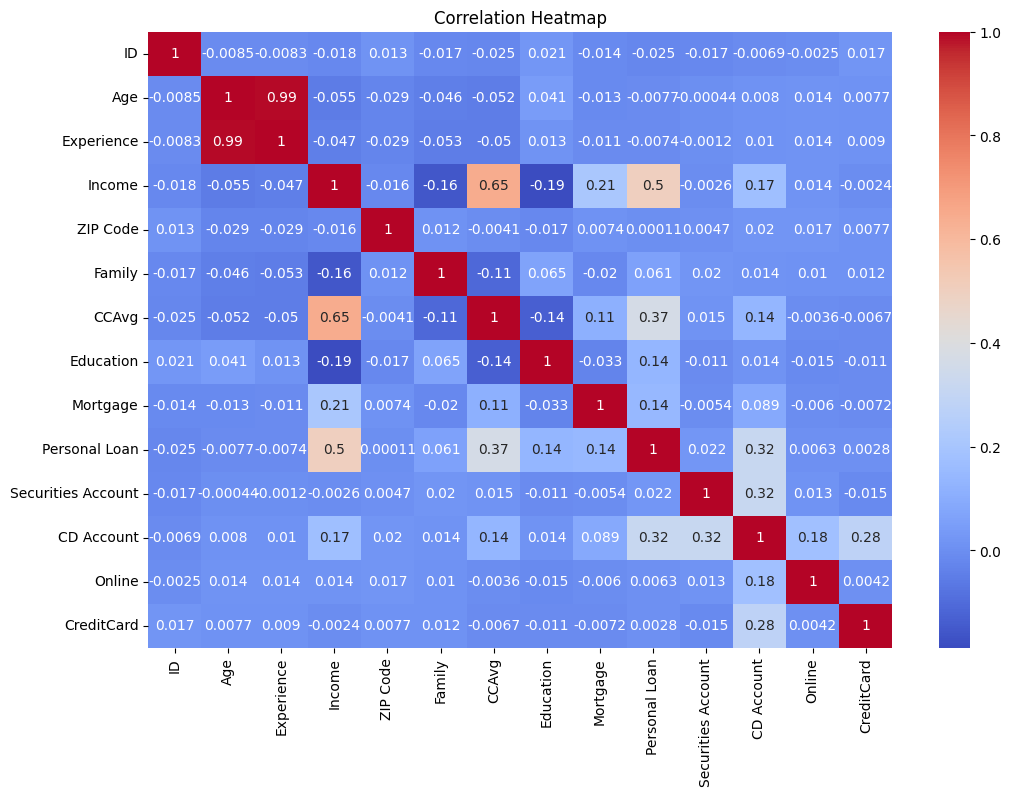

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
